In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np                                  
import pandas as pd 
import tensorflow as tf 
import keras
import matplotlib.pyplot as plt
# pd.set_option("display.max_colwidth", None)

In [6]:
data=pd.read_excel('/content/drive/MyDrive/Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx')


In [7]:
data.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [8]:
data.duplicated().sum()

83

In [9]:
data[data.duplicated()]

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
data.sample(5)

,Short description,Description,Caller,Assignment group
1782,reset erp password,\n\nreceived from: ztswnaom.lrapiwex@gmail.com...,ztswnaom lrapiwex,GRP_0
2435,pgi for delivery note 9169475765 not possible,pgi for delivery note 9169475765 not possible ...,tvmlrwkz rsxftjep,GRP_2
5116,pls. unlock & reset windows & erp account for ...,pls. unlock & reset windows & erp account for ...,vwpxjtof vmidzswj,GRP_0
3986,smart phone issue,my iphone 6 now has a reduced ear speaker(?). ...,ndyrowef biwecrgx,GRP_0
7582,æ–‡ä»¶æ— æ³•é€šè¿‡æ‰“å°æœºfe08æ‰“å°,æ–‡ä»¶æ— æ³•é€šè¿‡æ‰“å°æœºfe08æ‰“å°,omatlyrd bvraipdt,GRP_30


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8409 non-null   object
 1   Description        8416 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [14]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [15]:
data[data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [16]:
data.Description.replace(np.NaN, 'i am locked out of skype', inplace=True)

In [17]:
data[data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,eqmuniov ehxkcbgj,GRP_0


In [18]:
datacallers = data['Caller'].unique() 
datacallers.shape

(2950,)

In [19]:
dfbck=data.copy(deep=True)
data.drop(["Caller","Short description"],axis=1,inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8417 non-null   object
 1   Assignment group  8417 non-null   object
dtypes: object(2)
memory usage: 197.3+ KB


In [20]:
data.isnull().sum()

Description         0
Assignment group    0
dtype: int64

In [21]:
data["Assignment group"].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [22]:
# Target class is imbalanced
cls=data.groupby(['Assignment group']).size().reset_index(name='counts')
cls

,Assignment group,counts
0,GRP_0,3934
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


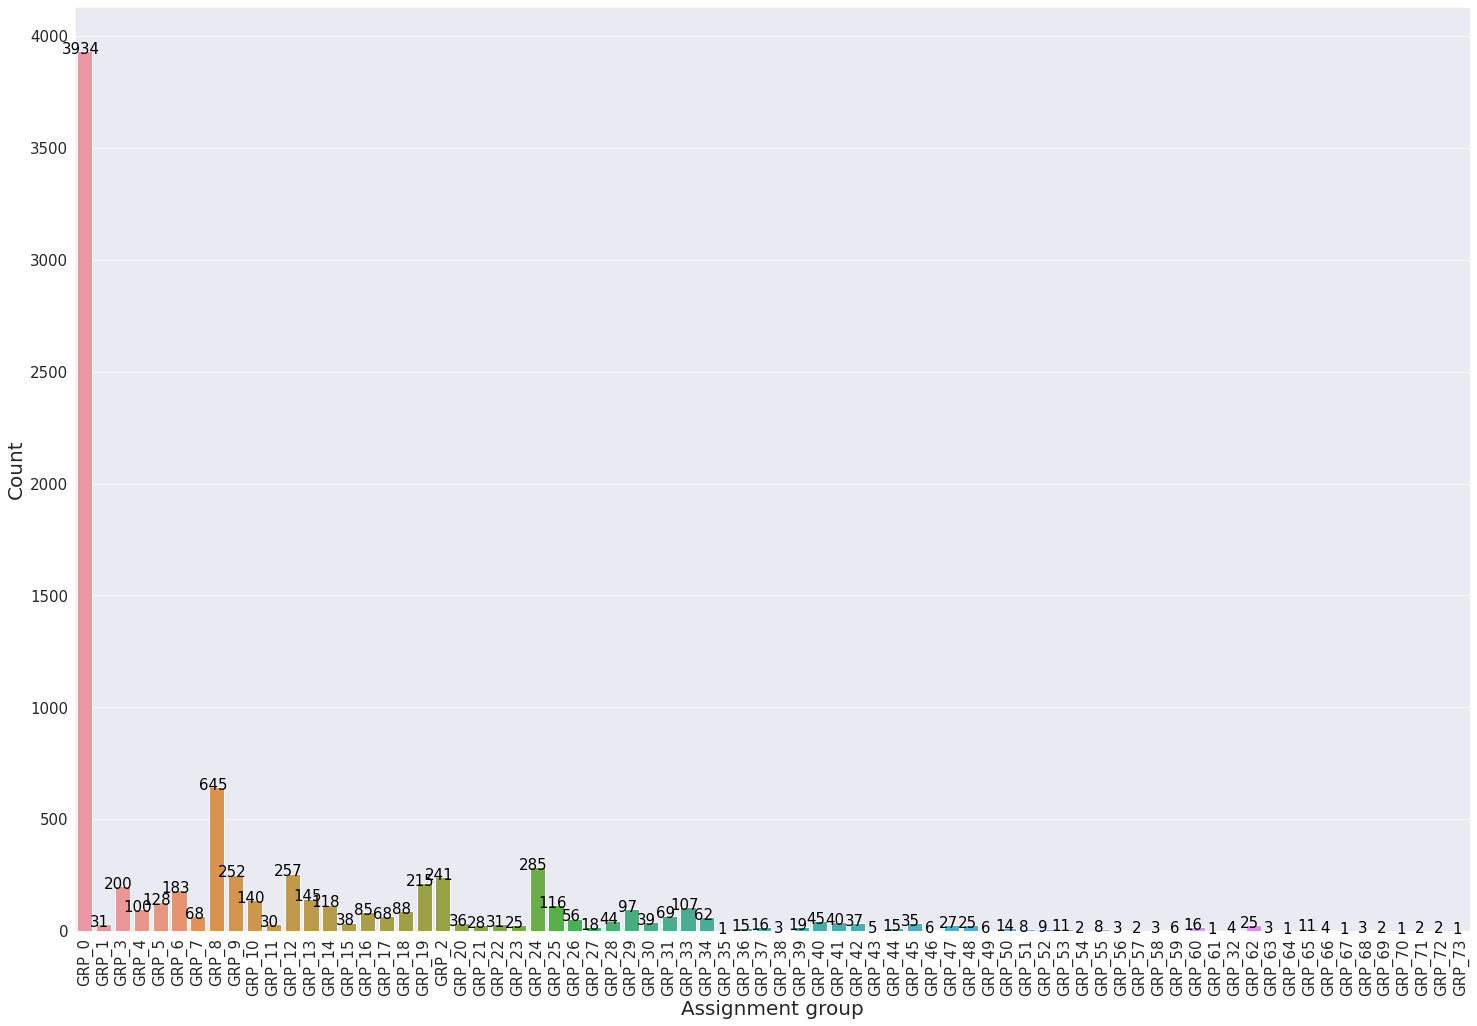

In [23]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(25,17))
g=sns.countplot(x='Assignment group', data=data);
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Assignment group",fontsize=20)
g.set_ylabel("Count",fontsize=20)
g.tick_params(labelsize=15)
for p in g.patches:
    g.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+120), ha='center', va='top', color='black', size=15)
plt.show()

In [24]:
targetCnt=data['Assignment group'].value_counts()
targetCnt.describe()

count      74.000000
mean      113.743243
std       460.731077
min         1.000000
25%         5.250000
50%        26.000000
75%        81.000000
max      3934.000000
Name: Assignment group, dtype: float64

In [25]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [26]:
from bs4 import BeautifulSoup
import re
import unicodedata
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))

In [27]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  


In [28]:
def clean_text(text):
    text=text.lower()
    text= re.sub(r"_x000D_",' ',text)
    text = re.sub(r'[\r|\n|\r\n]+', ' ',text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"issue resolved.",' ', text)
    # Removing url
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #Removing email 
    text = re.sub(r'\S+@\S+', '', text)
    text = text.replace("\\", ' ')
    # Removing numbers 
    text = re.sub(r'\d+','' ,text)
    # Removing accented characters
    text = remove_accented_chars(text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text= strip_html_tags(text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Removing special characters and\or digits    
    special_char_pattern = re.compile(r'([{.(-)!_,}])')
    text = special_char_pattern.sub(" \\1 ", text)
    text = remove_special_characters(text, remove_digits=True) 
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in datacallers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()

    return text

In [29]:
data['Clndescription'] = data['Description'].apply(clean_text)

In [30]:
data.sample(10) 

,Description,Assignment group,Clndescription
5951,office is not licensed,GRP_0,office is not licensed
5741,windows account locked,GRP_0,windows account locked
357,EU_tool aktualisierung alle 15 min lÃ¤uft nicht,GRP_25,eu tool aktualisierung alle min lauft nicht
5601,mii uacyltoe hxgaycze from lacw8515941 : step ...,GRP_14,mii uacyltoe hxgaycze from lacw step refresh p...
4394,ess portal\nexpense report 3111110041 approved...,GRP_10,ess portal expense report approved with wrong ...
2540,united kingdom has issues with making outbound...,GRP_7,united kingdom has issues with making outbound...
1123,iwifi companysecure not working at sao bernard...,GRP_4,iwifi companysecure not working at sao bernard...
7655,account unlock ybplwrez.lqcyehbf@gmail.com,GRP_0,account unlock
6287,i am stuck. 9168335496 has 3 lines. lines...,GRP_13,i am stuck has lines lines and have been inwar...
5983,need the bex analysis add-in,GRP_0,need the bex analysis addin


In [31]:
data=data.loc[(data.Clndescription.str.len() != 0)] 

In [32]:
!pip install langdetect 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.7 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=2cb8d302f12f35dfecb871922f3df8e17aeff1c2acc07fce9106622e22d1da34
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [33]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 10.9 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=0a872118bc13abf87d01fac4eb7a0e09d25bd7e4c329de56abab0635fe43d8fc
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [34]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 7.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [35]:
from langdetect import detect
from deep_translator import GoogleTranslator

def detectln(text):
  try:
    result_lang = detect(text)
  except:
    result_lang ='Other'
  return result_lang

#simple function to detect and translate text 
def detect_translate(text,target_lang):
    
    result_lang = detect(text)
    
    if result_lang == target_lang:
        return text 
    
    else:
        translated = GoogleTranslator(source='auto', target=target_lang).translate(text)
        return translated 

In [36]:
data["Language"] = data['Clndescription'].apply(lambda x: detectln(x)) 

In [37]:
data["Language"].unique()

array(['en', 'so', 'no', 'fr', 'it', 'es', 'af', 'sv', 'sl', 'ca', 'tl',
       'nl', 'id', 'fi', 'de', 'pt', 'cy', 'ro', 'pl', 'et', 'da', 'hu',
       'hr', 'sw', 'sq', 'sk', 'lt', 'cs', 'lv'], dtype=object)

In [38]:
data[data["Language"] != 'en'].groupby(['Language']).size().reset_index(name='counts')

,Language,counts
0,af,295
1,ca,49
2,cs,1
3,cy,8
4,da,59
5,de,406
6,es,63
7,et,13
8,fi,8
9,fr,120


In [39]:
data=data[data["Language"] != 'Other']

In [40]:
# Autodetecting language & Translating the same using Deep Translator library
data["Trndescription"] = data['Clndescription'].apply(lambda x: detect_translate(x,target_lang='en'))

In [41]:
data[data["Language"] != 'en'].sample(10)

,Description,Assignment group,Clndescription,Language,Trndescription
1505,unable to connect to vpn,GRP_0,unable to connect to vpn,es,unable to connect to vpn
1738,ticket update on ticket_no0447085,GRP_0,ticket update on ticket no,sv,ticket update on ticket no
1607,danyhuie deyhtwet - a plant manager - keeps sh...,GRP_26,danyhuie deyhtwet plant manager keeps showing ...,af,danyhuie deyhtwet plant manager keeps showing ...
3330,received from: monitoring_tool@company.com_x00...,GRP_6,xd job job failed in job scheduler at,sl,xd job job failed in job scheduler at
4647,mobile device activation,GRP_0,mobile device activation,fr,mobile device activation
5891,vpnä¸èƒ½ä½¿ç”¨ï¼Œè¯·è½¬ç»™å°è´º,GRP_0,vpna eac ie ecTMae o,ro,vpna eac ie ecTMae o
4398,\n\nreceived from: lixwgnto.krutnylz@gmail.com...,GRP_0,please unlock user ghjvreicj immediately in er...,de,please unlock user ghjvreicj immediately in er...
6446,install engineering_tool,GRP_0,install engineering tool,af,install engineering tool
3975,mobile device activation,GRP_0,mobile device activation,fr,mobile device activation
2600,password reset alert from o365,GRP_0,password reset alert from o,no,password reset alert from o


In [42]:
data['length']=[len(text) for text in data['Trndescription']]
data=data[data['length']>=3]
data['Trndescription'] = data['Trndescription'].apply(lambda x : " ".join([word for word in x.split() if(len(word)>2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
AsgnGrp=data.groupby(['Assignment group']).size().reset_index(name='counts')
AsgnGrp.set_index(['Assignment group'], inplace = True)
AsgnGrp

,counts
Assignment group,
GRP_0,3928
GRP_1,31
GRP_10,140
GRP_11,30
GRP_12,257
...,...
GRP_71,2
GRP_72,2
GRP_73,1


In [44]:
def assigngrp(grp):
  
  x=AsgnGrp.loc[grp][0]

  if x>10:
    return grp
  else:
    return "GRP_X"

In [45]:
data["ModifiedAssignGrp"]= data['Assignment group'].apply(lambda x: assigngrp(x))

In [46]:
n=data["ModifiedAssignGrp"].nunique()
n

50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


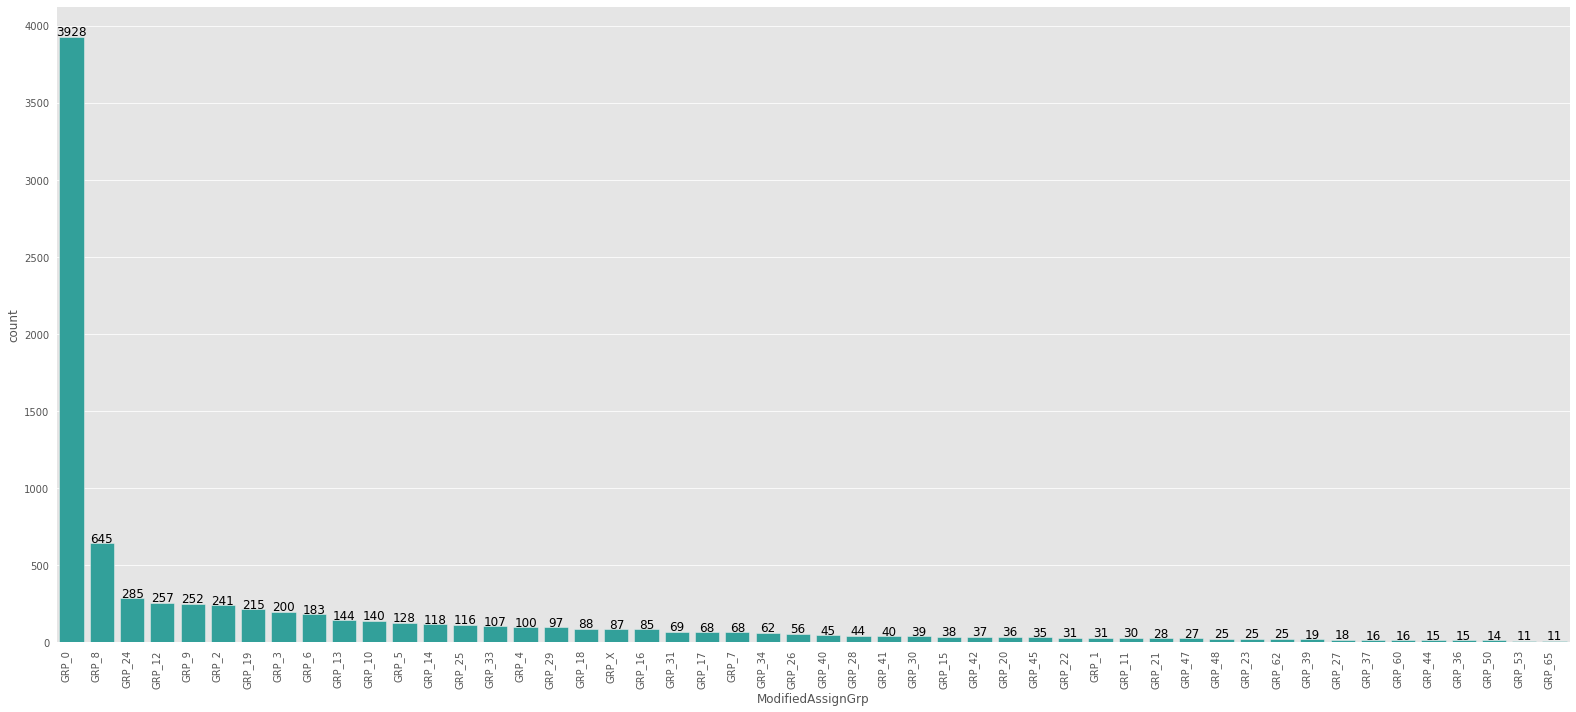

In [47]:
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm
plt.style.use('ggplot')
%matplotlib inline

descending_order = data["ModifiedAssignGrp"].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=data, color='lightseagreen',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+170), ha='center', va='top', color='black', size=12)
plt.show()

In [48]:
def lemmatize_corpus(corpus, text_lemmatization=True, stopword_removal=True):
    
    lemmatize_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        lemmatize_corpus.append(doc)
        
    return lemmatize_corpus

In [49]:
data['lmdescription'] = lemmatize_corpus(data['Trndescription'])

In [50]:
data.head(5)

,Description,Assignment group,Clndescription,Language,Trndescription,length,ModifiedAssignGrp,lmdescription
0,-verified user details.(employee# & manager na...,GRP_0,verified user details employee and manager nam...,en,verified user details employee and manager nam...,189,GRP_0,verified user detail employee manager name che...
1,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,xd xd xd hello team xd xd my meetingsskype mee...,en,hello team meetingsskype meetings etc are not ...,154,GRP_0,hello team meetingsskype meeting etc appearing...
2,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,xd xd xd hi xd xd cannot log on to vpn xd xd best,so,cannot log vpn best,49,GRP_0,log vpn best
3,unable to access hr_tool page,GRP_0,unable to access hr tool page,en,unable access tool page,29,GRP_0,unable access tool page
4,skype error,GRP_0,skype error,no,skype error,11,GRP_0,skype error


In [51]:
#Removing descriptions having length more than 3000 characters
data=data.loc[(data.lmdescription.str.len() < 3000)]

Analysing Text


In [52]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from wordcloud import WordCloud

In [53]:
combined_text=data.lmdescription.values.tolist()
combined_text[5]

'unable log engineering tool skype'

In [54]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  

data_words = list(sent_to_words(combined_text))

In [55]:
print(data_words[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [56]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [57]:
print(bigram_mod[data_words[5]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [58]:
print(trigram_mod[bigram_mod[data_words[5]]])

['unable', 'log', 'engineering', 'tool', 'skype']


In [59]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [60]:
data_words_bigrams = make_bigrams(data_words)

In [61]:
print(data_words_bigrams[5])

['unable', 'log', 'engineering', 'tool', 'skype']


In [62]:
wordclouds=' '.join(map(str, data_words_bigrams)) 

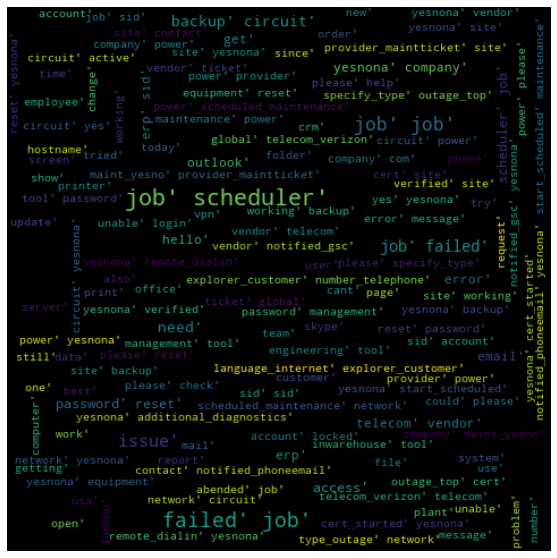

In [63]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

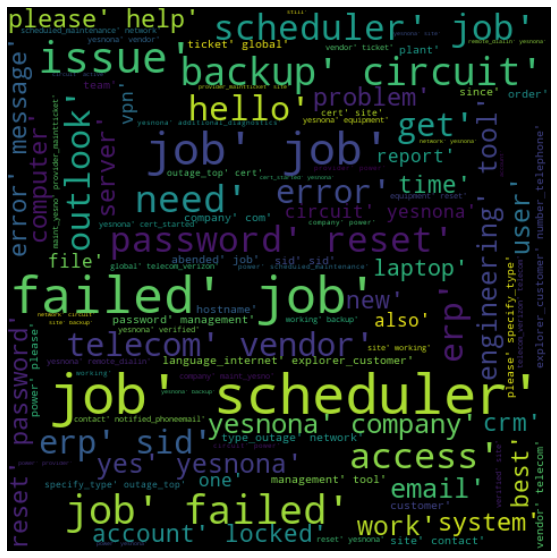

In [64]:
wordcloud_2 = WordCloud(width=480, height=480, max_words=100).generate(wordclouds)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [65]:
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [66]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 3), (13, 1)]]


In [67]:
lda_model = LdaModel(corpus=corpus,id2word=id2word,num_topics=7,random_state=200,update_every=1,chunksize=800,passes=10,alpha='auto',per_word_topics=True)

In [68]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.118*"yesnona" + 0.055*"site" + 0.048*"power" + 0.043*"circuit" + '
  '0.041*"vendor" + 0.036*"backup" + 0.028*"network" + 0.026*"company" + '
  '0.024*"telecom" + 0.023*"yes"'),
 (1,
  '0.032*"please" + 0.017*"email" + 0.015*"issue" + 0.015*"hello" + '
  '0.013*"outlook" + 0.011*"help" + 0.011*"company" + 0.011*"need" + '
  '0.010*"access" + 0.010*"new"'),
 (2,
  '0.277*"job" + 0.104*"scheduler" + 0.067*"failed" + 0.047*"abended" + '
  '0.023*"sid" + 0.014*"code" + 0.008*"tool" + 0.007*"india" + 0.007*"cold" + '
  '0.007*"hostname"'),
 (3,
  '0.024*"hostname" + 0.018*"printer" + 0.018*"plant" + 0.016*"order" + '
  '0.011*"server" + 0.010*"message" + 0.010*"print" + 0.009*"please" + '
  '0.009*"number" + 0.009*"error"'),
 (4,
  '0.027*"event" + 0.016*"name" + 0.015*"company" + 0.012*"device" + '
  '0.012*"language_internet" + 0.012*"number_telephone" + '
  '0.012*"explorer_customer" + 0.010*"hostname" + 0.010*"com" + '
  '0.010*"ticket"'),
 (5,
  '0.025*"ticket" + 0.025*"tool"

In [69]:
texts=data_words_bigrams
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.117778337503463

Coherence Score:  0.5490271787815896


In [70]:
# adding a deep copy to another dataframe df to other Dataframe
data =  data.copy()
data['num_words'] = data.Description.apply(lambda x : len(x.split()))
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,8395.0,138.946516,223.847606,3.0,35.0,62.0,155.0,3874.0
num_words,8395.0,26.902799,44.646987,1.0,6.0,12.0,30.0,1057.0


In [71]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [72]:
word_distribution

,bins,counts
0,0-100,7990
1,100-300,378
2,300-500,17
3,500-800,8
4,>800,2


Text(0.5, 1.0, 'Word distribution per bin')

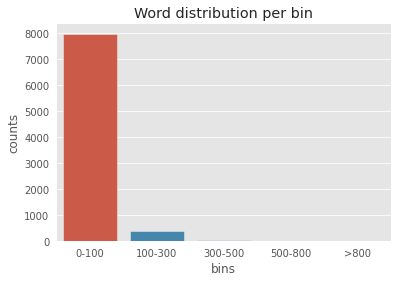

In [73]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# split X and y into training and testing sets
trainX, testX, trainY, testY = train_test_split(data['lmdescription'], data['ModifiedAssignGrp'], random_state=100)

In [76]:
#Traing data
print(trainX.shape)
print(trainY.shape)

(6296,)
(6296,)


In [77]:
#Test Data
print(testX.shape)
print(testY.shape)

(2099,)
(2099,)


In [78]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_df=0.7,analyzer='word')

In [79]:
# transforming the training data to document_term_matrix
vectorizer.fit(trainX)
trainX_tf=vectorizer.transform(trainX)

In [80]:
#Converting Test descriptions also to tf-idf vectors
testX_tf = vectorizer.transform(testX)

In [81]:
trainX_tf.shape

(6296, 8757)

In [82]:
testX_tf.shape

(2099, 8757)

In [83]:
len(vectorizer.vocabulary_)

8757

In [84]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

Support Vector Machine Classifier


In [85]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10], } 

In [86]:
svc = SVC()
svc_gs = GridSearchCV(svc,param_grid,cv=2)
svc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [87]:
svc_gs.best_params_

{'C': 10, 'gamma': 0.1}

In [88]:
svc_tf = SVC(C=10, gamma=0.1)
svc_tf.fit(trainX_tf, trainY)
pred_testY_tf = svc_tf.predict(testX_tf)
#Calculate accuracy on Test Dataset
metrics.accuracy_score(testY, pred_testY_tf)

0.6545974273463554

In [89]:
resultsml=pd.DataFrame()
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, pred_testY_tf)],'Pred_Unsampled_Accuracy': 'NA'},index={'1'})
resultsml = pd.concat([resultsml, tempResults])

Random Forest Classifier

In [90]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}

In [91]:
rfc=RandomForestClassifier()
rfc_gs = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)
rfc_gs.fit(trainX_tf, trainY)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [92]:
rfc_gs.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [93]:
rfc_tf=RandomForestClassifier(max_features='sqrt', n_estimators= 200, criterion='gini')
rfc_tf.fit(trainX_tf, trainY)
predY_rf=rfc_tf.predict(testX_tf)
print("Accuracy:",metrics.accuracy_score(testY, predY_rf))

Accuracy: 0.6288708909004288


In [94]:
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset1'], 'Pred_Accuracy': [metrics.accuracy_score(testY, predY_rf)],'Pred_Unsampled_Accuracy': 'NA'},index={'2'})
resultsml = pd.concat([resultsml, tempResults])

Neural Network Model

In [95]:
import tensorflow as tf
import numpy as np

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
letrainY = le.fit_transform(trainY.values)
letestY = le.transform(testY.values)

In [97]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [98]:
#Add hidden layers
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(len(vectorizer.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
#Add Output layer
model.add(tf.keras.layers.Dense(n, activation='softmax'))

In [99]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [100]:
model.fit(trainX_tf, letrainY, epochs=10, batch_size=32, validation_data=(testX_tf, letestY))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


197/197 [==============================] - 4s 16ms/step - loss: 2.5132 - acc: 0.4930 - val_loss: 1.9897 - val_acc: 0.5326
Epoch 2/10
197/197 [==============================] - 3s 15ms/step - loss: 1.8663 - acc: 0.5538 - val_loss: 1.8215 - val_acc: 0.5674
Epoch 3/10
197/197 [==============================] - 3s 15ms/step - loss: 1.5791 - acc: 0.6055 - val_loss: 1.6940 - val_acc: 0.6036
Epoch 4/10
197/197 [==============================] - 3s 15ms/step - loss: 1.3238 - acc: 0.6561 - val_loss: 1.6111 - val_acc: 0.6203
Epoch 5/10
197/197 [==============================] - 3s 15ms/step - loss: 1.1247 - acc: 0.7043 - val_loss: 1.5924 - val_acc: 0.6274
Epoch 6/10
197/197 [==============================] - 3s 15ms/step - loss: 0.9466 - acc: 0.7505 - val_loss: 1.6075 - val_acc: 0.6255
Epoch 7/10
197/197 [==============================] - 3s 15ms/step - loss: 0.8080 - acc: 0.7808 - val_loss: 1.6422 - val_acc: 0.6336
Epoch 8/10
197/197 [==============================] - 3s 15ms/step - loss: 0.696

In [101]:
score = model.evaluate(testX_tf, letestY, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

66/66 [==============================] - 0s 2ms/step - loss: 1.8099 - acc: 0.6365
Test Score: 1.8099439144134521
Test Accuracy: 0.6364935636520386


In [102]:
tempResults = pd.DataFrame({'Model':['Neural Network Classifier Dataset1'], 'Pred_Accuracy': [score[1]],'Pred_Unsampled_Accuracy': 'NA'},index={'3'})
resultsml = pd.concat([resultsml, tempResults])

Data Augementation

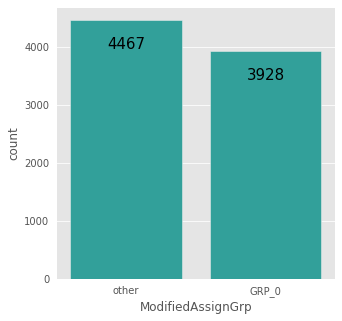

In [103]:
# Creating the Dataset for classifying GRP_0
dfGRP0Others = data.copy(deep=True)
dfGRP0Others['ModifiedAssignGrp']=dfGRP0Others['ModifiedAssignGrp'].apply(lambda x : 'other' if x != 'GRP_0'  else x)

descending_order = dfGRP0Others['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(5,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfGRP0Others, color='lightseagreen',order=descending_order);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+10), ha='center', va='top', color='black', size=15)
plt.show()

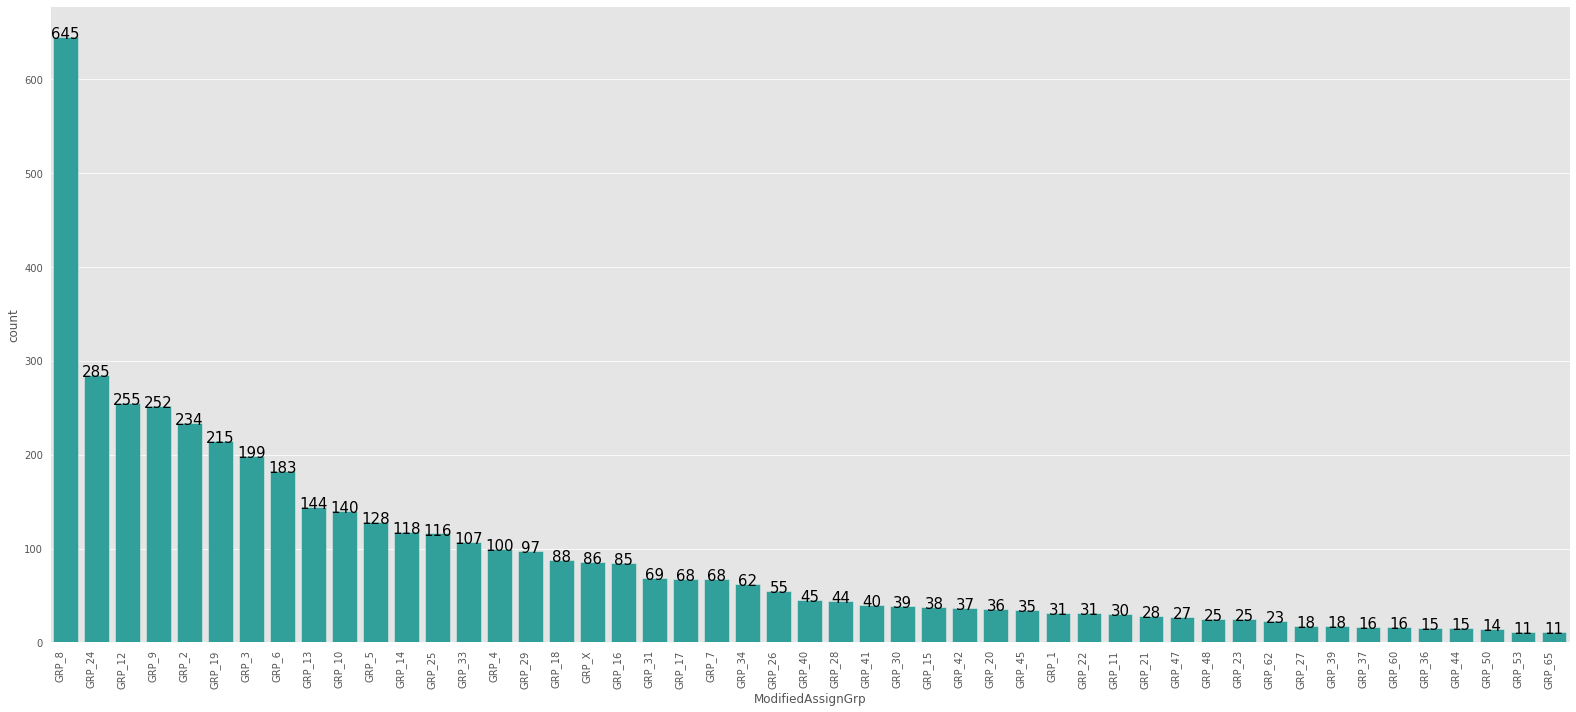

In [104]:
#Creating Dataset for 'others' i.e all groups which is not part of GRP_0
dfOthers = data[data['ModifiedAssignGrp'] != 'GRP_0']

descending_order = dfOthers['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,10))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers, color='lightseagreen',order=descending_order);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+30), ha='center', va='top', color='black', size=15)
plt.show()

In [105]:
maxOthers = dfOthers['ModifiedAssignGrp'].value_counts().max()
maxOthers

645

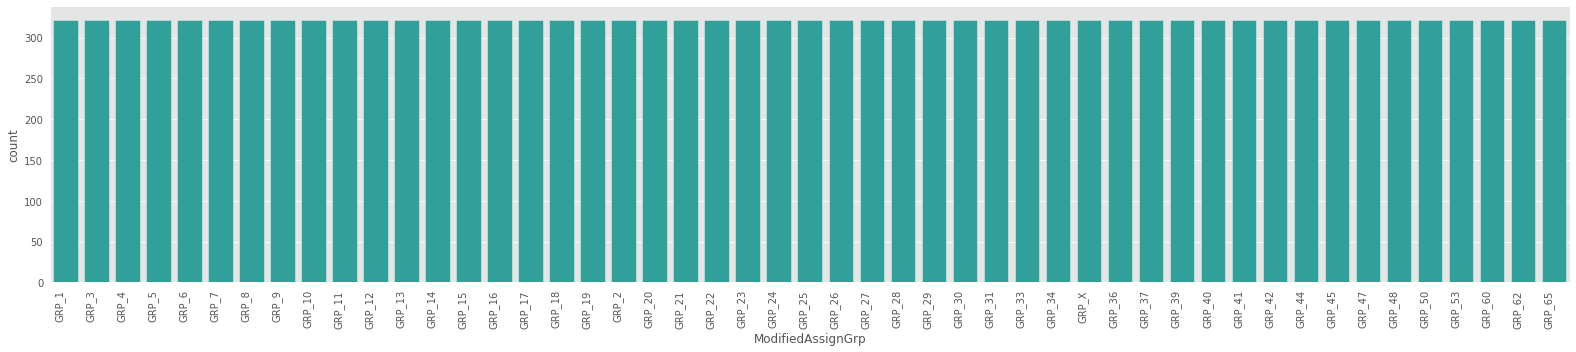

In [106]:
# Treating the imbalnce in the 'other' dataset by resampling
from sklearn.utils import resample

dfOthers_resampled = dfOthers[0:0]
for grp in dfOthers['ModifiedAssignGrp'].unique():
    dfGrp = dfOthers[dfOthers['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers/2), random_state=123)
    dfOthers_resampled = dfOthers_resampled.append(resampled)

dfGRP0 = dfGRP0Others[dfGRP0Others['ModifiedAssignGrp'] == 'GRP_0']
otherGrpsResampled = pd.concat([dfGRP0,dfOthers_resampled])
otherGrpsResampled.reset_index(inplace=True)

descending_order = dfOthers_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=dfOthers_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

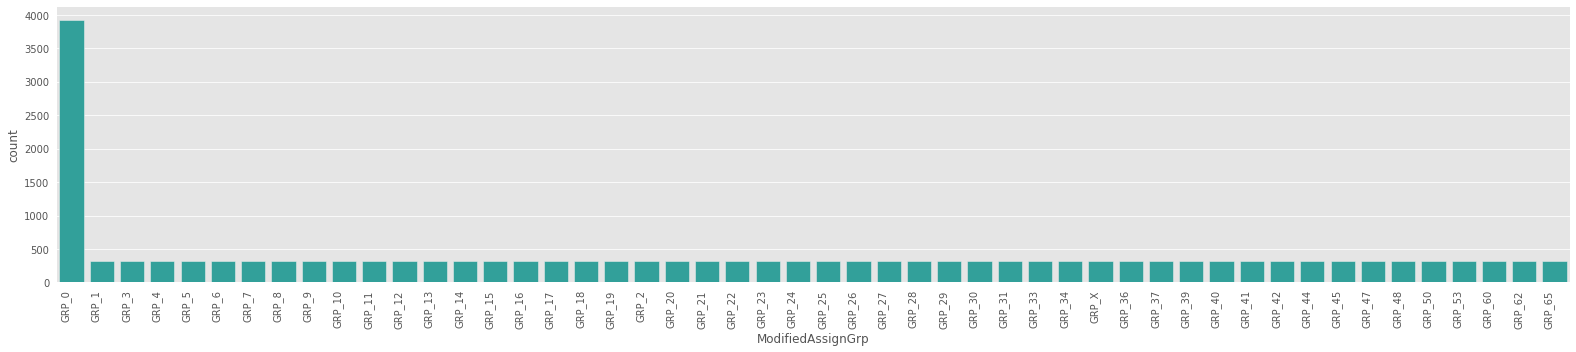

In [107]:
# Imbalance only in minority classes has been addressed and all the minority classes have been upsampled at the same level
descending_order = otherGrpsResampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=otherGrpsResampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

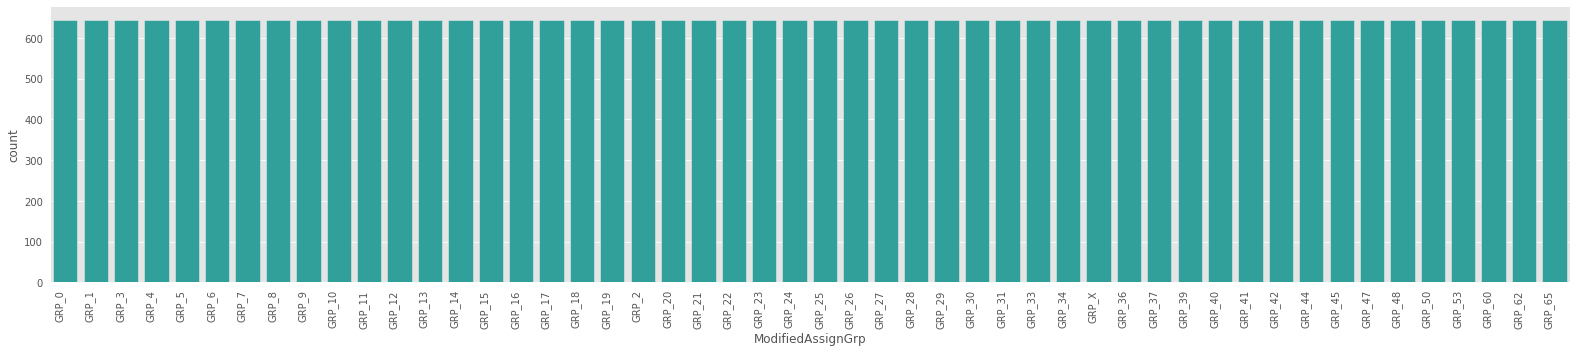

In [108]:
# Treating the imbalance in the df dataset by resampling to 632.This is for us to try creating a single model which 
# uses the whole dataset & verify the performance
df_resampled = data[0:0]
for grp in data['ModifiedAssignGrp'].unique():
    dfGrp = data[data['ModifiedAssignGrp'] == grp]
    resampled = resample(dfGrp, replace=True, n_samples=int(maxOthers), random_state=123)
    df_resampled = df_resampled.append(resampled)

descending_order = df_resampled['ModifiedAssignGrp'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='ModifiedAssignGrp', data=df_resampled, color='lightseagreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

**Creating Reusable Functions to use BiLSTM**


In [109]:
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [110]:
from sklearn import preprocessing
def labelencoder(dataframe) : 
  label_encoder = preprocessing.LabelEncoder() 
  dataframe= label_encoder.fit_transform(dataframe)
  grp_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
  return dataframe,grp_mapping


df_resampled['ModifiedAssignGrpEN'] , grp_mapping_others_resampled= labelencoder(df_resampled['ModifiedAssignGrp'])
data['ModifiedAssignGrpEN'] , grp_mapping_others_rawdata= labelencoder(data['ModifiedAssignGrp'])
otherGrpsResampled['ModifiedAssignGrpEN'] , grp_mapping_all_resampled= labelencoder(otherGrpsResampled['ModifiedAssignGrp'])

In [111]:
# Adding Function to capture results from each model 
import operator
def captureData(dataframe,modelHistory,modelName,descriptions,index_df,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    index, acc_value = max(enumerate(modelHistory.history['val_accuracy']), key=operator.itemgetter(1))
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'val_accuracy': [acc_value],
      'val_loss':[modelHistory.history['val_loss'][index]],
      'loss':[modelHistory.history['loss'][index]],
      'accuracy':[modelHistory.history['accuracy'][index]],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','val_accuracy' ,'val_loss','loss','accuracy','descriptions']] 
  return dataframe

def capturePrediction(dataframe,modelName,descriptions,index_df,pred_accuracy,unseen_accuracy,resetData):
  if resetData == 1:
    tempResultsDf=pd.DataFrame()
    dataframe=pd.DataFrame()
  else:
    tempResultsDf= pd.DataFrame(
      {'model':[modelName], 
      'Pred_Accuracy' : [pred_accuracy],
      'Pred_Unsampled_Accuracy' : [unseen_accuracy],
      'descriptions':[descriptions]},index={str(index_df)})
    dataframe = pd.concat([dataframe,tempResultsDf])
    dataframe = dataframe[['model','Pred_Accuracy','Pred_Unsampled_Accuracy','descriptions']] 
  return dataframe

In [112]:
sentences = [line.split(' ') for line in df_resampled['lmdescription']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format('/content/drive/My Drive/word2vec_vector.txt')


In [113]:
# loading the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/My Drive/word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 8546 word vectors.


In [114]:
EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.100d.txt'
embeddings_glove = {}
for o in open(EMBEDDING_FILE, encoding="utf8"):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings_glove[word] = embd

print("Dimension of the embedding vector is {}".format(len(embeddings_glove["collaboration"])))

Dimension of the embedding vector is 100


In [115]:
maxlen = 300
numWords=9000
epochs = 8

In [116]:
class LstmModel:
  model= Model()
  X_test=[]
  y_test=[]
  embedding_matrix=[]

  def wordTokenizer(self, dataframe):
    tokenizer = Tokenizer(num_words=numWords,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
    tokenizer.fit_on_texts(dataframe)
    dataframe = tokenizer.texts_to_sequences(dataframe)
    return tokenizer,dataframe
  
  def splitData(self,X,y):

    print("Number of Samples:", len(X))
    print("Number of Labels: ", len(y))
    X_train, self.X_test, y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
    X_train, X_Val, y_train, y_Val = train_test_split(X, y, test_size=0.2, random_state=10)
    print("Number of train Samples:", len(X_train))
    print("Number of val Samples:", len(X_Val))

    return X_train, self.X_test, y_train, self.y_test, X_Val, y_Val

  def tokenizeAndEmbedding(self,dataframe, mdltype):
    
    tokenizer,X = self.wordTokenizer(dataframe['lmdescription'])
    y = np.asarray(dataframe['ModifiedAssignGrpEN'])
    X = pad_sequences(X, maxlen = maxlen)

    self.embedding_matrix = np.zeros((numWords+1,100))
    for i,word in tokenizer.index_word.items():
      if i<numWords+1: 
        if mdltype == 'ltm':
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
        if mdltype == 'glv':
          embedding_vector = embeddings_glove.get(word)
          if embedding_vector is not None:
            self.embedding_matrix[i] = embedding_vector
    return X,y

  def train(self, dataframe, batch_size, epochs, mdltype):
   
    X,y = self.tokenizeAndEmbedding(dataframe,mdltype)
    X_train, _, y_train, _, X_Val, y_Val = self.splitData(X,y)
    model_history = self.fitModel(X_train,y_train,X_Val,y_Val,batch_size, epochs)
    return model_history

  def fitModel(self,X_train,y_train,X_Val,y_Val,batch_size, epochs):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)
    embed = Embedding(numWords+1,output_dim=100,input_length=maxlen,weights=[self.embedding_matrix], trainable=True)(input_layer)  
    lstm=Bidirectional(LSTM(128))(embed)
    drop=Dropout(0.3)(lstm)
    dense =Dense(100,activation='relu')(drop)
    out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

    self.model = Model(input_layer,out)
    self.model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    self.model.summary()

    checkpoint = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto') 
    reduceLoss = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
    model_history = self.model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, callbacks=[checkpoint,reduceLoss], validation_data=(X_Val,y_Val))

    return model_history,self.model

  def prediction(self):
      
     pred = self.model.predict(self.X_test)
     pred = [i.argmax() for i in pred]
     accuracy = metrics.accuracy_score(self.y_test, pred)
     print("Accuracy of the model :",metrics.accuracy_score(self.y_test, pred))
     return accuracy

  def plotModelAccuracy(self, history, modelname):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title(modelname+' model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title(modelname+' model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

  def prediction_unseen(self, dataframe, mdltype ): 
    X_unseen,y_unseen = self.tokenizeAndEmbedding(dataframe,mdltype)
    predunseen = self.model.predict(X_unseen)
    predunseen = [i.argmax() for i in predunseen]
    accuracy_unseen = metrics.accuracy_score(y_unseen, predunseen)
    print("Accuracy of the model unsampled data:",metrics.accuracy_score(y_unseen, predunseen))
    return accuracy_unseen

LSTM Modelling on Unsampled dataset(Dataset1):


In [117]:
# Checking how the LSTM Model performs with the cleansed Unaugmenteddata
W2VDataset1 = LstmModel()
W2VDataset1_history, model = W2VDataset1.train(data,100,epochs,'ltm')
W2VDataset1_accuracy = W2VDataset1.prediction()


Number of Samples: 8395
Number of Labels:  8395
Number of train Samples: 6716
Number of val Samples: 1679
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          900100    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
 dense_4 (Dense)   

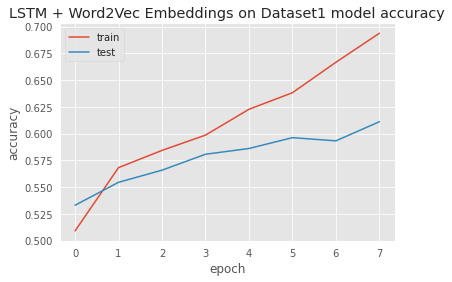

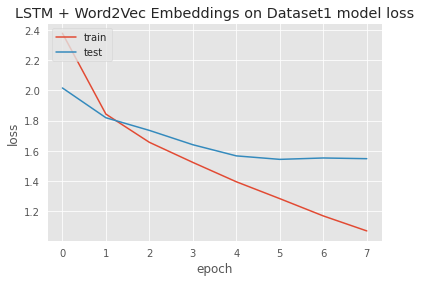

In [118]:
W2VDataset1.plotModelAccuracy(W2VDataset1_history, 'LSTM + Word2Vec Embeddings on Dataset1')

In [119]:
results=pd.DataFrame()
pred_results = pd.DataFrame()
results=captureData(results,W2VDataset1_history,'LSTM model_WV_Dataset1','LSTM+Word2Vec Embedding on Dataset1','1',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_Dataset1','LSTM+Word2Vec Embedding on Dataset1','1',W2VDataset1_accuracy,'NA',0)

In [120]:
# Checking how the LSTM Model perform with the cleansed Unaugmenteddata
GloveDataset1 = LstmModel()
GloveDataset1_history, model = GloveDataset1.train(data,100,epochs,'glv')
GloveDataset1_accuracy = GloveDataset1.prediction()

Number of Samples: 8395
Number of Labels:  8395
Number of train Samples: 6716
Number of val Samples: 1679
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
 dense_6 (Dense)   

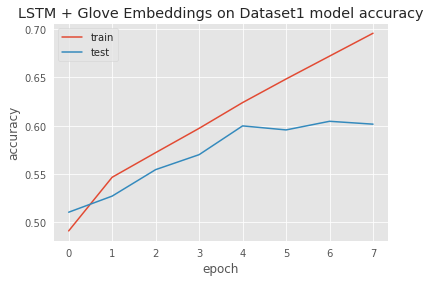

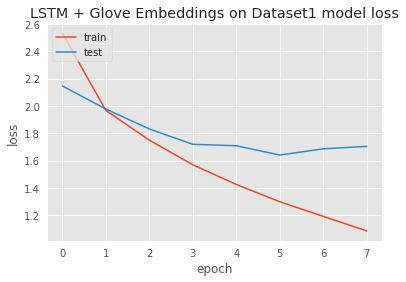

In [121]:
GloveDataset1.plotModelAccuracy(GloveDataset1_history, 'LSTM + Glove Embeddings on Dataset1')

In [122]:
results=captureData(results,GloveDataset1_history,'LSTM model_GloVe_Dataset1','LSTM+GloVe Embedding on Dataset1','2',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_Dataset1','LSTM+GloVe Embedding on Dataset1','2',GloveDataset1_accuracy,'NA',0)

## Modelling on Df_Resampled dataset(Dataset2): 

***Data set has been created by resampling minority classes and majority class to bring them at parity***


Traditional ML Models

In [123]:
# split X and y into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(df_resampled['lmdescription'], df_resampled['ModifiedAssignGrp'], random_state=100)

In [124]:
#Traing data
print(train_X.shape)
print(train_Y.shape)

(24187,)
(24187,)


In [125]:
#Test Data
print(test_X.shape)
print(test_Y.shape)

(8063,)
(8063,)


In [126]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Random Forest Classifier

In [127]:
rfc = Pipeline(steps=[ ('pre_processing',TfidfVectorizer(lowercase=False)),
                        ('RFClf',RandomForestClassifier())])

In [128]:
param_grid = { 
    'RFClf__n_estimators': [100, 200],
    'RFClf__max_features': ['auto', 'sqrt', 'log2'],
    'RFClf__criterion' :['gini', 'entropy']
    }

In [129]:
grid_rfc = GridSearchCV(rfc, param_grid=param_grid, cv=2)

In [130]:
grid_rfc

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClf', RandomForestClassifier())]),
             param_grid={'RFClf__criterion': ['gini', 'entropy'],
                         'RFClf__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClf__n_estimators': [100, 200]})

In [131]:
# training the classifier 
grid_rfc.fit(train_X,train_Y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('RFClf', RandomForestClassifier())]),
             param_grid={'RFClf__criterion': ['gini', 'entropy'],
                         'RFClf__max_features': ['auto', 'sqrt', 'log2'],
                         'RFClf__n_estimators': [100, 200]})

In [132]:
grid_rfc.best_params_

{'RFClf__criterion': 'gini',
 'RFClf__max_features': 'log2',
 'RFClf__n_estimators': 100}

In [133]:
# testing model performance on test data 
rfcpred_Y = grid_rfc.predict(test_X)

In [134]:
# Model Accuracy
print("Accuracy:", accuracy_score(test_Y, rfcpred_Y))

Accuracy: 0.9356318987969738


In [135]:
# testing model performance on original unsampled data 
rfcpredY = grid_rfc.predict(trainX)

In [136]:
# Model Accuracy
print("Accuracy:", accuracy_score(trainY, rfcpredY))

Accuracy: 0.7692185514612452


In [137]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResults = pd.DataFrame({'Model':['Random Forest Classifier Dataset2'], 'Pred_Accuracy': [accuracy_score(test_Y, rfcpred_Y)],'Pred_Unsampled_Accuracy': [accuracy_score(trainY, rfcpredY)]},index={'4'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.654597,NA
2,Random Forest Classifier Dataset1,0.628871,NA
3,Neural Network Classifier Dataset1,0.636494,NA
4,Random Forest Classifier Dataset2,0.935632,0.769219


Support Vector Machine Classifier

In [138]:
svmc = Pipeline(steps=[ ('pre_processing',TfidfVectorizer(lowercase=False)),
                        ('SVMClf',SVC())])

In [139]:
param_grid = {'SVMClf__C': [0.1, 1, 10, 100], 
              'SVMClf__gamma': [0.001, 0.01, 0.1, 1], } 

In [140]:
grid_svmc = GridSearchCV(svmc, param_grid=param_grid, cv=2)

In [141]:
grid_svmc

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClf', SVC())]),
             param_grid={'SVMClf__C': [0.1, 1, 10, 100],
                         'SVMClf__gamma': [0.001, 0.01, 0.1, 1]})

In [142]:
# training the classifier 
grid_svmc.fit(train_X,train_Y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('pre_processing',
                                        TfidfVectorizer(lowercase=False)),
                                       ('SVMClf', SVC())]),
             param_grid={'SVMClf__C': [0.1, 1, 10, 100],
                         'SVMClf__gamma': [0.001, 0.01, 0.1, 1]})

In [143]:
grid_svmc.best_params_

{'SVMClf__C': 100, 'SVMClf__gamma': 1}

In [144]:
# testing model performance on test data 
svmcpred_Y = grid_svmc.predict(test_X)

In [145]:
# Model Accuracy
print("Accuracy:", accuracy_score(test_Y, svmcpred_Y))

Accuracy: 0.9394766216048617


In [146]:
# testing model performance on original unsampled data 
svmcpredY = grid_svmc.predict(trainX)

In [147]:
# Model Accuracy
print("Accuracy:", accuracy_score(trainY, svmcpredY))

Accuracy: 0.8217916137229987


In [148]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResults = pd.DataFrame({'Model':['SVM Classifier Dataset2'], 'Pred_Accuracy': [accuracy_score(test_Y, svmcpred_Y)], 'Pred_Unsampled_Accuracy': [accuracy_score(trainY, svmcpredY)] },index={'5'})
resultsml = pd.concat([resultsml, tempResults])
resultsml

,Model,Pred_Accuracy,Pred_Unsampled_Accuracy
1,SVM Classifier Dataset1,0.654597,NA
2,Random Forest Classifier Dataset1,0.628871,NA
3,Neural Network Classifier Dataset1,0.636494,NA
4,Random Forest Classifier Dataset2,0.935632,0.769219
5,SVM Classifier Dataset2,0.939477,0.821792


**LSTM Model data**

In [149]:
# Checking how the LSTM Model perform with all the data which is cleansed & resampled to make the target balanced
W2VDataset2 = LstmModel()
W2VDataset2_history, model = W2VDataset2.train(df_resampled,100,epochs,'ltm')
W2VDataset2_accuracy = W2VDataset2.prediction()
W2VDataset2_unsampled_accuracy=W2VDataset2.prediction_unseen(data,'ltm')

Number of Samples: 32250
Number of Labels:  32250
Number of train Samples: 25800
Number of val Samples: 6450
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               25700     
                                                                 
 dense_8 (Dense)

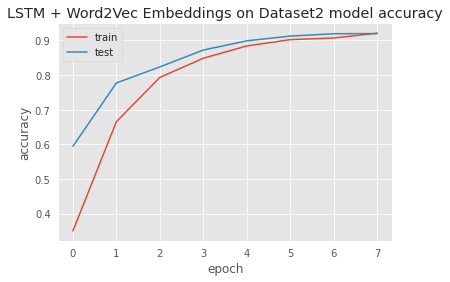

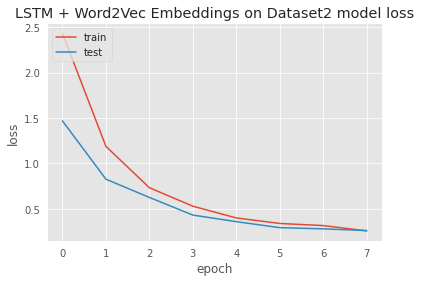

In [150]:
W2VDataset2.plotModelAccuracy(W2VDataset2_history, 'LSTM + Word2Vec Embeddings on Dataset2')

In [151]:
results=captureData(results,W2VDataset2_history,'LSTM model_WV_Dataset2','LSTM+Word2Vec Embedding on Dataset2','3',0)
pred_results= capturePrediction(pred_results,'LSTM model_WV_Dataset2','LSTM+Word2Vec Embedding on Dataset2','3',W2VDataset2_accuracy,W2VDataset2_unsampled_accuracy,0)

In [152]:
# Checking how the LSTM Model perform with all the data which is cleansed & resampled to make the target balanced
GloveDataset2 = LstmModel()
GloveDataset2_history, model = GloveDataset2.train(df_resampled,100,epochs,'glv')
GloveDataset2_accuracy = GloveDataset2.prediction()
GloveDataset2_unsampled_accuracy=GloveDataset2.prediction_unseen(data,'glv')

Number of Samples: 32250
Number of Labels:  32250
Number of train Samples: 25800
Number of val Samples: 6450
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 100)          900100    
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               25700     
                                                                 
 dense_10 (Dense

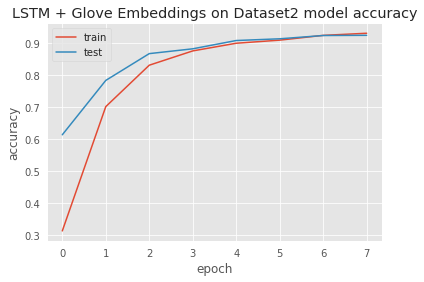

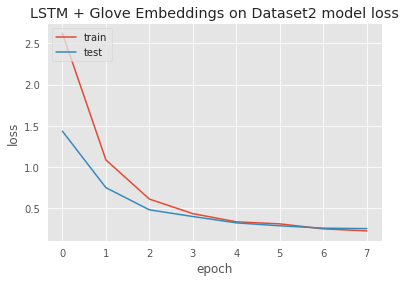

In [159]:
GloveDataset2.plotModelAccuracy(GloveDataset2_history, 'LSTM + Glove Embeddings on Dataset2')

In [160]:
results=captureData(results,GloveDataset2_history,'LSTM model_GloVe_Dataset2','LSTM+GloVe Embedding on Dataset2','4',0)
pred_results= capturePrediction(pred_results,'LSTM model_GloVe_Dataset2','LSTM+GloVe Embedding on Dataset2','4',GloveDataset2_accuracy,GloveDataset2_unsampled_accuracy,0)

In [164]:
finalmdl = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('SVMClf',SVC(C=100, gamma=1))
                                 ])


In [165]:
# training selected classifier 
finalmdl.fit(trainX,trainY)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('SVMClf', SVC(C=100, gamma=1))])

In [171]:
# testing model performance on test data 
finalpredY = finalmdl.predict(testX)
accuracy_score(test_Y, rfcpred_Y)

0.9356318987969738

In [172]:
#save model 
import joblib 
joblib.dump(finalmdl, '/content/drive/My Drive/ticketmodel.pkl')


['/content/drive/My Drive/ticketmodel.pkl']